# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, November 15, 2021 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
#conda update conda

In [2]:
#pip install xgboost

In [3]:
#pip install lightgbm

In [4]:
#conda install -c conda-forge xgboost
#conda install -c conda-forge lightgbm
#conda install -c conda-forge catboost

In [5]:
#conda install -c conda-forge lightgbm

In [6]:
#conda install -c conda-forge catboost

In [2]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
#import lightgbm as 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC


from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
import os
os.getcwd()
#path="C:\\Users\\jonah\\Documents\\Schoolwork\\CPSC 330\\cpsc330-2021W2\\hw"
path="C:\\Users\\jonah\\Documents\\Schoolwork\\CPSC 330\\cpsc330-2021W2\\hw\hw6"
os.chdir(path)

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (4-10 hours) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

And the targets: 

- default.payment.next.month: Default payment (1=yes, 0=no)

ID is a simple identifier, and useless for actual classification assuming the samples are not sorted in any particular order.

LIMIT_BAL is the max amount they are allowed to borrow, which is likely useful. Lower balance probably means less trustworthy. 

SEX is simply their sex, 1 for male, 2 for female. One gender may be more default-prone, so this is worth coding as a dummy.

Education is in levels. While there is ordinal value, we have a large sample size and no reason to assume the gap between levels is linear, so this is going to OHE as well.

Marriage is 1 for married, 2 for single, 3 for "other". Married couples are likely more stable, so I'll OHE this. 

Age is age in years. Numeric variable. 

PAY_X shows the size of their payment delays in each month. I intend to code these as numeric, though I'm aware there is most likely a non-linearity between those with no pay delays and those with some. Using dummies would be risky,a as we have 7 PAY_ variables with 9  possible values each, which starts to drift into overfitting our dataset.

BILL_AMTX are the amount spent each month. This will certainly be numeric and worth including.

PAY_AMTX is how much is paid each month - numeric and worthwhile like BILL_AMTX. 

In [8]:
credit  = pd.read_csv("UCI_Credit_Card.csv")
credit.head()
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [9]:
y = credit["default.payment.next.month"]
X = credit.drop(["default.payment.next.month", "ID"], axis=1)

In [10]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [11]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =2/3, random_state=1)

I'm using a train size of 1/3 of the dataset because it reduces training intensity - my laptop struggles and I'll be training multiple models. I'm aware this will not be ideal. 

In [13]:
#X_train
#y_train

In [14]:
#X_test
#y_test

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
full_train = X_train.join(y_train)
full_train.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26865,140000.0,1,2,1,48,1,2,2,2,2,...,90514.0,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0,1
19701,140000.0,2,1,2,32,0,0,0,0,0,...,121248.0,123232.0,126242.0,5000.0,6000.0,6000.0,5500.0,5000.0,6000.0,0
11586,160000.0,2,1,2,29,-1,2,-1,0,-1,...,736.0,3542.0,1852.0,0.0,1852.0,0.0,3542.0,0.0,1116.0,0


In [17]:
# no null values, so no imputation needed!
full_train.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Summary Statistics

In [18]:
full_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,167933.768000,1.602800,1.85860,1.544600,35.481500,-0.028200,-0.12670,-0.160300,-0.218000,-0.262700,...,42729.835300,39607.54710,38077.022800,5557.489100,6.024059e+03,5333.905000,4658.572100,4661.563600,5077.564500,0.213200
std,130111.374908,0.489343,0.78388,0.522913,9.146017,1.125936,1.19983,1.209194,1.182462,1.143599,...,63622.009737,60314.56319,58874.704596,15215.085854,2.218385e+04,18651.897431,14748.236431,14865.393749,16287.920713,0.409588
min,10000.000000,1.000000,0.00000,0.000000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.00000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.00000,1.000000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,...,2188.500000,1769.50000,1261.000000,900.000000,8.052500e+02,400.000000,300.750000,274.000000,178.750000,0.000000
50%,140000.000000,2.000000,2.00000,2.000000,34.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,19027.000000,17913.50000,16778.000000,2080.500000,2.000000e+03,1758.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.00000,2.000000,41.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,54718.250000,50000.00000,48757.250000,5022.250000,5.000000e+03,4447.750000,4000.000000,4005.000000,4018.250000,0.000000
max,1000000.000000,2.000000,6.00000,3.000000,75.000000,8.000000,7.00000,7.000000,8.000000,7.000000,...,891586.000000,927171.00000,961664.000000,493358.000000,1.227082e+06,896040.000000,497000.000000,417990.000000,351282.000000,1.000000


1. We can see that the mean value of `default.payment.next.month` is 0.213, meaning a roughly 1/5 chance. Standard deviation is 0.41, which is fairly wide, so it's fairly variable by month.

2. Most are limited to around 17,000 balance, with average monthly payments variable but aroudn 4500-6000. 

3. Sex has a mean of 1.6. As men are coded to 1 and women to 2, this implies about 60 percent women, 40 percent men.

# Data Visualization

(array([2.883e+03, 4.865e+03, 1.198e+03, 8.970e+02, 1.080e+02, 3.100e+01,
        9.000e+00, 2.000e+00, 7.000e+00]),
 array([-2.        , -0.88888889,  0.22222222,  1.33333333,  2.44444444,
         3.55555556,  4.66666667,  5.77777778,  6.88888889,  8.        ]),
 <BarContainer object of 9 artists>)

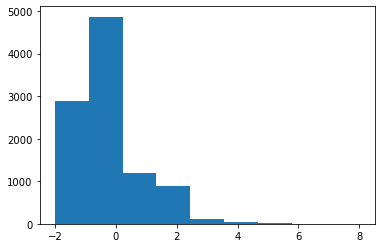

In [19]:
# histogram of default

plt.hist(full_train["PAY_0"], bins=9)

<AxesSubplot:>

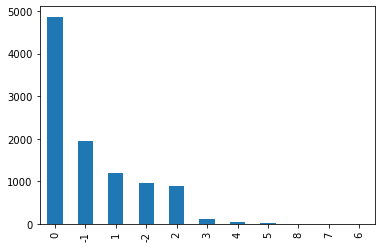

In [20]:
# plot of PAY_0

pay_0_cts = full_train["PAY_0"].value_counts().sort_values(ascending=False)
pay_0_cts.plot.bar()

Using the first period just as an example, we see that most people either pay immediately (-1) or in the month expected (0). Long delays are fairly rare.

There is a -2 value, confusingly not accounted for in the documentation, and it is fairly common. [Some discussion on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/71771#423791) implies it means a fully-paid balance, or even overpaid. This doesn't throw the order wildly out, so I doubt it should be a problem (since we're not very interested in causal inference, the model's predictions will probably learn well to the data even with some oddness). 

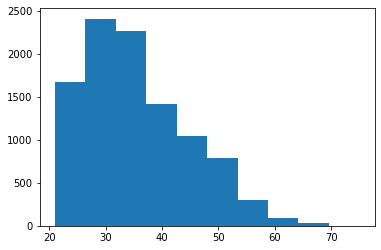

In [21]:
# histogram for age
plt.hist(full_train["AGE"])
plt.show()

We know the mean age is around 35, which jives with this. We have a rough bell curve around the mid-thirties with a sharp cutoff just above age 20, likely because of laws stating anyone younger cannot have a credit card.

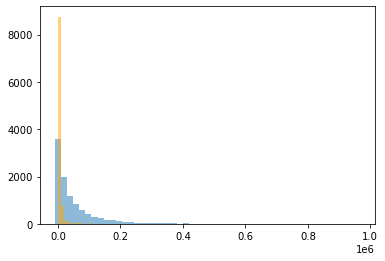

In [22]:
# histogram for BILL_AMT_1 and PAY_AMT1
plt.hist(full_train["BILL_AMT1"], bins = 50, alpha = 0.5)
plt.hist(full_train["PAY_AMT1"], bins = 50, alpha = 0.5, color = "orange")
plt.show()

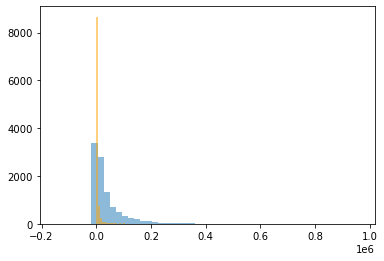

In [23]:
# same, for BILL_AMT6 and PAY_AMT_6
plt.hist(full_train["BILL_AMT6"], bins = 50, alpha = 0.5)
plt.hist(full_train["PAY_AMT6"], bins = 50, alpha = 0.5, color = "orange")
plt.show()

So, we've got pretty steep stackings of PAY_AMT at 0 for both time periods. BILL_AMT also stacks at 0, but to a much lower degree. 

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [24]:
X_train.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26865,140000.0,1,2,1,48,1,2,2,2,2,...,89397.0,90514.0,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0
19701,140000.0,2,1,2,32,0,0,0,0,0,...,118713.0,121248.0,123232.0,126242.0,5000.0,6000.0,6000.0,5500.0,5000.0,6000.0
11586,160000.0,2,1,2,29,-1,2,-1,0,-1,...,1852.0,736.0,3542.0,1852.0,0.0,1852.0,0.0,3542.0,0.0,1116.0


In [25]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

I want to:

- turn SEX to SEX-1 so that it can be used as a yes/no for female
- interact that SEX value with EDUCATION so that Education can be allowed to have different effects for men and women
- turn MARRIAGE to MARRIAGE-1 so that it can be used as a yes/no for marriage
- interact this new MARRIAGE with SEX to get a variable for married women

`MARFEM` will be a dummy variable, OHE'd. `FEMED` will be coded as the other education variable.

In [26]:
X_train["SEX"] = X_train["SEX"] - 1
X_train["MARRIAGE"] = X_train["MARRIAGE"] - 1
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
26865,140000.0,0,2,0,48,1,2,2,2,2,...,89397.0,90514.0,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0
19701,140000.0,1,1,1,32,0,0,0,0,0,...,118713.0,121248.0,123232.0,126242.0,5000.0,6000.0,6000.0,5500.0,5000.0,6000.0
11586,160000.0,1,1,1,29,-1,2,-1,0,-1,...,1852.0,736.0,3542.0,1852.0,0.0,1852.0,0.0,3542.0,0.0,1116.0
14140,240000.0,1,1,1,27,1,2,0,0,0,...,38552.0,18580.0,12773.0,5423.0,0.0,19000.0,437.0,1000.0,1000.0,5503.0
25537,230000.0,1,1,1,37,1,-2,-2,-2,-1,...,-152.0,-152.0,42668.0,130.0,0.0,0.0,0.0,42820.0,0.0,1000.0


In [27]:
X_train["MARFEM"] = X_train["SEX"] * X_train["MARRIAGE"]
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARFEM
26865,140000.0,0,2,0,48,1,2,2,2,2,...,90514.0,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0,0
19701,140000.0,1,1,1,32,0,0,0,0,0,...,121248.0,123232.0,126242.0,5000.0,6000.0,6000.0,5500.0,5000.0,6000.0,1
11586,160000.0,1,1,1,29,-1,2,-1,0,-1,...,736.0,3542.0,1852.0,0.0,1852.0,0.0,3542.0,0.0,1116.0,1
14140,240000.0,1,1,1,27,1,2,0,0,0,...,18580.0,12773.0,5423.0,0.0,19000.0,437.0,1000.0,1000.0,5503.0,1
25537,230000.0,1,1,1,37,1,-2,-2,-2,-1,...,-152.0,42668.0,130.0,0.0,0.0,0.0,42820.0,0.0,1000.0,1


In [28]:
X_train["FEMED"] = X_train["SEX"]*X_train["EDUCATION"]
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARFEM,FEMED
26865,140000.0,0,2,0,48,1,2,2,2,2,...,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0,0,0
19701,140000.0,1,1,1,32,0,0,0,0,0,...,123232.0,126242.0,5000.0,6000.0,6000.0,5500.0,5000.0,6000.0,1,1
11586,160000.0,1,1,1,29,-1,2,-1,0,-1,...,3542.0,1852.0,0.0,1852.0,0.0,3542.0,0.0,1116.0,1,1
14140,240000.0,1,1,1,27,1,2,0,0,0,...,12773.0,5423.0,0.0,19000.0,437.0,1000.0,1000.0,5503.0,1,1
25537,230000.0,1,1,1,37,1,-2,-2,-2,-1,...,42668.0,130.0,0.0,0.0,0.0,42820.0,0.0,1000.0,1,1


In [29]:
X_test["SEX"] = X_test["SEX"] - 1
X_test["MARRIAGE"] = X_test["MARRIAGE"] - 1

X_test["MARFEM"] = X_test["SEX"] * X_test["MARRIAGE"]
X_test["FEMED"] = X_test["SEX"]* X_test["EDUCATION"]
X_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARFEM,FEMED
10747,310000.0,0,3,0,32,0,0,0,0,0,...,57779.0,14163.0,8295.0,6000.0,4000.0,3000.0,1000.0,2000.0,0,0
12573,10000.0,1,3,0,49,-1,-1,-2,-1,2,...,1138.0,930.0,0.0,0.0,2828.0,0.0,182.0,0.0,0,3
29676,50000.0,0,2,0,28,-1,-1,-1,0,-1,...,1300.0,43987.0,0.0,46257.0,2200.0,1300.0,43987.0,1386.0,0,0
8856,80000.0,1,3,0,52,2,2,3,3,3,...,39816.0,40607.0,3700.0,1600.0,1600.0,0.0,1600.0,1600.0,0,3
21098,270000.0,0,1,1,34,1,2,0,0,2,...,15490.0,17343.0,0.0,4000.0,2000.0,0.0,2000.0,2000.0,0,0


In [30]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'MARFEM',
       'FEMED'],
      dtype='object')

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

ID is a simple identifier, and useless for actual classification assuming the samples are not sorted in any particular order.

LIMIT_BAL is the max amount they are allowed to borrow, which is likely useful. Lower balance probably means less trustworthy.

SEX is simply their sex, 1 for male, 2 for female. One gender may be more default-prone, so this is worth coding as a dummy.

Education is in levels. While there is ordinal value, we have a large sample size and no reason to assume the gap between levels is linear, so this is going to OHE as well.

Marriage is 1 for married, 2 for single, 3 for "other". Married couples are likely more stable, so I'll OHE this.

Age is age in years. Numeric variable.

PAY_X shows the size of their payment delays in each month. I intend to code these as numeric, though I'm aware there is most likely a non-linearity between those with no pay delays and those with some. Using dummies would be risky,a as we have 7 PAY_ variables with 9 possible values each, which starts to drift into overfitting our dataset.

BILL_AMTX are the amount spent each month. This will certainly be numeric and worth including.

PAY_AMTX is how much is paid each month - numeric and worthwhile like BILL_AMTX.

In [31]:
ohe_feats = ["SEX", "EDUCATION", "MARRIAGE", "MARFEM", "FEMED"]
num_feats = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [32]:
numeric_transformer = make_pipeline(StandardScaler())

ohe_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

preprocessor = make_column_transformer(
    (numeric_transformer, num_feats),
    (ohe_transformer, ohe_feats),
    #("drop", drop_features),
)

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

I'm not bothering to preprocess data for this, as the X values have no impact on the dummy classifier.

In [33]:
dummy = DummyClassifier()

dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7748

We get a prediction accuracy of 0.7748, which is approximately 1 minus the class balance of the `y_test` dataset, which is what we expect from the dummy classifier.

In [34]:
1 - y_train.mean()

0.7867999999999999

In [35]:
1 - y_test.mean()

0.7747999999999999

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [36]:
lr_pipe_base = make_pipeline(
    preprocessor, LogisticRegression(max_iter=250)
)

lr_pipe_base.fit(X_train, y_train)
#lr_pipe_base.predict()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                               

In [37]:
#clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
lr_pipe_cv = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
print(cross_val_score(lr_pipe_cv, X_train, y_train, cv=5))
print(cross_val_score(lr_pipe_cv, X_train, y_train, cv=5).mean())

[0.8165 0.8265 0.8145 0.8205 0.821 ]
0.8198000000000001


Out of the box, logistic regression gets us cross validation accuracy of 0.8198. It's not hugely greater than dummy classifier, but it represents actual training on the information.

Hyperparameters to tune:
- C
- balanced versus normal class weights

~~I will do a RandomizedSearchCV over a log-uniform distribution of C, and between "balanced" and standard class weights. 

Turns out this isn't working for me, so I will instead do a pseudo-gridsearch over a range of C values (0.1 to 100) and varying balanced and unbalanced approaches.

In [38]:
# C = 0.1, None
lr_pipe_cv_point1 = make_pipeline(preprocessor, LogisticRegression(max_iter=500, C=0.1, class_weight="None"))
p1scores = cross_validate(lr_pipe_cv_point1, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
p1scores
#print(p1scores.mean())

{'fit_time': array([0.24399805, 0.20900512, 0.20208621, 0.16800642, 0.20300031]),
 'score_time': array([0.02599788, 0.02299523, 0.01899886, 0.02199006, 0.02300358]),
 'test_accuracy': array([0.8155, 0.8265, 0.8145, 0.8215, 0.822 ]),
 'test_precision': array([0.71323529, 0.75      , 0.67741935, 0.76335878, 0.73026316]),
 'test_recall': array([0.22716628, 0.28103044, 0.24647887, 0.23474178, 0.26056338]),
 'test_f1': array([0.34458259, 0.4088586 , 0.36144578, 0.35906643, 0.38408304])}

In [39]:
# C = 0.1, bal
lr_pipe_cv_point1_bal = make_pipeline(preprocessor, LogisticRegression(max_iter=500, C=0.1, class_weight="balanced"))
p1balscores = cross_validate(lr_pipe_cv_point1_bal, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
p1balscores

{'fit_time': array([0.27254677, 0.23903799, 0.22600293, 0.22700286, 0.22700119]),
 'score_time': array([0.01999784, 0.02199507, 0.01999617, 0.02299881, 0.02200484]),
 'test_accuracy': array([0.6975, 0.689 , 0.6985, 0.7215, 0.7085]),
 'test_precision': array([0.37907609, 0.36734694, 0.37302726, 0.40120664, 0.38438881]),
 'test_recall': array([0.65339578, 0.6323185 , 0.61032864, 0.62441315, 0.61267606]),
 'test_f1': array([0.47979364, 0.46471601, 0.46304541, 0.48852158, 0.47239819])}

In [40]:
# C = 1, None
lr_pipe_cv_1 = make_pipeline(preprocessor, LogisticRegression(max_iter=500, C = 1, class_weight=None))
one_scores = cross_validate(lr_pipe_cv_1, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
one_scores

{'fit_time': array([0.48204446, 0.46099448, 0.452003  , 0.57759094, 0.85527492]),
 'score_time': array([0.01899624, 0.02008629, 0.01899672, 0.02400279, 0.02100062]),
 'test_accuracy': array([0.8165, 0.8265, 0.8145, 0.8205, 0.821 ]),
 'test_precision': array([0.7173913 , 0.74691358, 0.67295597, 0.7518797 , 0.72077922]),
 'test_recall': array([0.23185012, 0.28337237, 0.25117371, 0.23474178, 0.26056338]),
 'test_f1': array([0.35044248, 0.41086587, 0.36581197, 0.35778175, 0.38275862])}

In [41]:
# C = 1, bal
lr_pipe_cv_bal = make_pipeline(preprocessor, LogisticRegression(max_iter=500, C=1, class_weight="balanced"))
one_bal_scores = cross_validate(lr_pipe_cv_bal, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
one_bal_scores

{'fit_time': array([0.67802978, 0.5486393 , 0.6195755 , 0.55604863, 0.57000089]),
 'score_time': array([0.01999784, 0.02399516, 0.02199793, 0.02199244, 0.02207184]),
 'test_accuracy': array([0.697 , 0.688 , 0.6985, 0.719 , 0.708 ]),
 'test_precision': array([0.37756498, 0.36562074, 0.37266187, 0.39910979, 0.38416422]),
 'test_recall': array([0.64637002, 0.62763466, 0.60798122, 0.6314554 , 0.61502347]),
 'test_f1': array([0.47668394, 0.46206897, 0.46208742, 0.48909091, 0.47292419])}

In [42]:
# C = 10, None
lr_pipe_cv_10 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=10, class_weight=None))
ten_scores = cross_validate(lr_pipe_cv_10, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
ten_scores

{'fit_time': array([0.98908448, 1.01209807, 0.97804379, 0.8852365 , 1.05811357]),
 'score_time': array([0.02099705, 0.01799846, 0.01900196, 0.02099609, 0.02299929]),
 'test_accuracy': array([0.8165, 0.8265, 0.8145, 0.8205, 0.82  ]),
 'test_precision': array([0.7173913 , 0.74691358, 0.67080745, 0.7518797 , 0.71153846]),
 'test_recall': array([0.23185012, 0.28337237, 0.25352113, 0.23474178, 0.26056338]),
 'test_f1': array([0.35044248, 0.41086587, 0.36797274, 0.35778175, 0.3814433 ])}

In [43]:
# C = 10, bal
lr_pipe_cv_10_bal = make_pipeline(preprocessor, LogisticRegression(max_iter=500, C=10, class_weight="balanced"))
ten_bal_scores = cross_validate(lr_pipe_cv_10_bal, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
ten_bal_scores

{'fit_time': array([0.75199866, 0.72857165, 0.58869386, 0.68206501, 1.03608751]),
 'score_time': array([0.01899862, 0.01899672, 0.02311635, 0.02151489, 0.02399874]),
 'test_accuracy': array([0.696 , 0.6885, 0.6975, 0.7185, 0.7075]),
 'test_precision': array([0.37653479, 0.36648501, 0.37159254, 0.39851852, 0.38360176]),
 'test_recall': array([0.64637002, 0.62997658, 0.60798122, 0.6314554 , 0.61502347]),
 'test_f1': array([0.47586207, 0.46339363, 0.46126447, 0.48864668, 0.47249775])}

In [44]:
# C = 100, None
lr_pipe_cv_100 = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=100, class_weight=None))
hundred_scores = cross_validate(lr_pipe_cv_100, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
hundred_scores["test_f1"].mean()

0.37403874387539326

In [45]:
# C = 100, bal
lr_pipe_cv_100_bal = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=100, class_weight="balanced"))
hundred_bal_scores = cross_validate(lr_pipe_cv_100_bal, X_train, y_train, cv = 5, scoring = ("accuracy", "precision", "recall", "f1"))
hundred_bal_scores

{'fit_time': array([0.93903804, 0.77616501, 1.08652067, 1.30070281, 1.27808404]),
 'score_time': array([0.01999879, 0.02499795, 0.01912355, 0.02099991, 0.02499866]),
 'test_accuracy': array([0.696 , 0.6885, 0.697 , 0.7185, 0.706 ]),
 'test_precision': array([0.37653479, 0.36648501, 0.37106017, 0.39851852, 0.3819242 ]),
 'test_recall': array([0.64637002, 0.62997658, 0.60798122, 0.6314554 , 0.61502347]),
 'test_f1': array([0.47586207, 0.46339363, 0.46085409, 0.48864668, 0.47122302])}

In [46]:
print(p1scores["test_f1"].mean())
print(p1balscores["test_f1"].mean())
print(one_scores["test_f1"].mean())
print(one_bal_scores["test_f1"].mean())
print(ten_scores["test_f1"].mean())
print(ten_bal_scores["test_f1"].mean())
print(hundred_scores["test_f1"].mean())
print(hundred_bal_scores["test_f1"].mean())

0.37160729034423223
0.4736949655150743
0.373532138374329
0.47257108442046175
0.3737012294197784
0.47233291917357284
0.37403874387539326
0.4719958988182473


In [47]:
print(p1scores["test_accuracy"].mean())
print(p1balscores["test_accuracy"].mean())
print(one_scores["test_accuracy"].mean())
print(one_bal_scores["test_accuracy"].mean())
print(ten_scores["test_accuracy"].mean())
print(ten_bal_scores["test_accuracy"].mean())
print(hundred_scores["test_accuracy"].mean())
print(hundred_bal_scores["test_accuracy"].mean())

0.82
0.703
0.8198000000000001
0.7021
0.8196
0.7016
0.8195
0.7012


In [48]:
print(p1scores["test_recall"].mean())
print(p1balscores["test_recall"].mean())
print(one_scores["test_recall"].mean())
print(one_bal_scores["test_recall"].mean())
print(ten_scores["test_recall"].mean())
print(ten_bal_scores["test_recall"].mean())
print(hundred_scores["test_recall"].mean())
print(hundred_bal_scores["test_recall"].mean())

0.24999615177403217
0.6266264252179744
0.2523402711350068
0.6256929555474926
0.25280975470308187
0.6261613396224341
0.25327923827115695
0.6261613396224341


From my ghetto gridsearch, we can see a few trends:

- `balanced` models have much better f1 scores than unbalanced models, typically around 0.1 better
- unbalanced average 0.12 greater accuracy than unbalanced models
- within the `balanced` models, lower C values have better accuracy and f1
- We get *much* better recall on the balanced models, but can assume worse precision

Because we're trying to find fraud cases and likely investigate those classified as fraud more, we may be more concerned about false negatives. Therefore I would suggest the `balanced` models. Variations in evaluation metrics across balanced models seem very minor, so any will do. I would lean towards the lower `C` values to pick simpler models - so I would continue with the "C=0.1, Balanced" model if I chose one of these to train on the full dataset.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

from sklearn.neighbors import KNeighborsClassifierI'll be trying:
- KNN
- random forest
- LGBMClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# KNN

knn_pipe_base = make_pipeline(preprocessor, KNeighborsClassifier())

knn_base_scores = cross_validate(knn_pipe_base, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))
#knn_base_scores

In [51]:
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=1, n_jobs=-1))
rf_base_scores = cross_validate(pipe_rf, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))
#rf_base_scores

In [52]:
# LGBMClassifier base
lgbm_pipe_base = make_pipeline(preprocessor, LGBMClassifier())
lgbm_base_scores = cross_validate(lgbm_pipe_base, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))
#lgbm_base_scores

How do they compare out of the box?

In [53]:
knn_avgs = pd.DataFrame.from_dict(knn_base_scores, orient="index").mean(axis=1)
rf_avgs = pd.DataFrame.from_dict(rf_base_scores, orient="index").mean(axis=1)
lgbm_avgs = pd.DataFrame.from_dict(lgbm_base_scores, orient="index").mean(axis=1)
p1bal_avgs = pd.DataFrame.from_dict(p1balscores, orient="index").mean(axis=1)

overall_scores = pd.DataFrame([knn_avgs, rf_avgs, lgbm_avgs, p1bal_avgs])
overall_scores["classifier"] = ["KNN", "random forest", "lgbm", "LogReg"]
overall_scores = overall_scores.set_index(keys = "classifier")
#.set_index(keys=["knn", "random forest", "lgbm"])
#overall_scores = pd.DataFrame([knn_avgs, rf_avgs, lgbm_avgs])
overall_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
classifier,,,,,,
KNN,0.044999,0.927045,0.8004,0.556093,0.331605,0.414565
random forest,3.225916,0.100799,0.8202,0.640438,0.360227,0.460641
lgbm,0.720450,0.043202,0.8237,0.660108,0.357408,0.463343
LogReg,0.238318,0.021399,0.7030,0.381009,0.626626,0.473695


Of the three new models:
Gradient-boosted trees come first in accuracy, precision, and f1. Random forest is the best at recall and second in every other evaluation metric. These two are fairly similar, admittedly. KNN is clearly the worst of the three. 

Comparing to LogReg, the new models perform similarly to the logistic regressions with unbalanced class weights - they have better accuracy and precision, but much worse recall, though random forest and lgbm have comparable f1 scores to logistic regression.

While I won't do a full hyperparameter optimization, I will instead re-run random forest and lgbm, this time with balanced class weights. 

In [54]:
# LGBMClassifier balanced
lgbm_pipe_bal = make_pipeline(preprocessor, LGBMClassifier(class_weight="balanced"))
lgbm_bal_scores = cross_validate(lgbm_pipe_bal, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [55]:
# randomforestclassifier balanced
pipe_rf_bal = make_pipeline(preprocessor, RandomForestClassifier(random_state=1, n_jobs=-1, class_weight="balanced"))
rf_bal_scores = cross_validate(pipe_rf_bal, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [56]:
knn_avgs = pd.DataFrame.from_dict(knn_base_scores, orient="index").mean(axis=1)
rf_avgs = pd.DataFrame.from_dict(rf_base_scores, orient="index").mean(axis=1)
lgbm_avgs = pd.DataFrame.from_dict(lgbm_base_scores, orient="index").mean(axis=1)
p1bal_avgs = pd.DataFrame.from_dict(p1balscores, orient="index").mean(axis=1)
bal_rf_avgs = pd.DataFrame.from_dict(rf_bal_scores, orient="index").mean(axis=1)
bal_lgbm_avgs = pd.DataFrame.from_dict(lgbm_bal_scores, orient="index").mean(axis=1)



overall_scores = pd.DataFrame([knn_avgs, rf_avgs, lgbm_avgs, p1bal_avgs, bal_rf_avgs, bal_lgbm_avgs])
overall_scores["classifier"] = ["KNN", "random forest", "lgbm", "LogReg", "random forest balanced", "lgbm balanced"]
overall_scores = overall_scores.set_index(keys = "classifier")
overall_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
classifier,,,,,,
KNN,0.044999,0.927045,0.8004,0.556093,0.331605,0.414565
random forest,3.225916,0.100799,0.8202,0.640438,0.360227,0.460641
lgbm,0.720450,0.043202,0.8237,0.660108,0.357408,0.463343
LogReg,0.238318,0.021399,0.7030,0.381009,0.626626,0.473695
random forest balanced,1.540462,0.090798,0.8147,0.615905,0.351781,0.446898
lgbm balanced,0.600441,0.035212,0.7752,0.478664,0.595210,0.530184


Now it's a tossup.

- Best Accuracy: basic LGBM
- Best Precision: basic LGBM
- Best Recall: optimized balanced Logistic Regression
- Best f1: balanced LGBM

If I picked one to go forward with, it would probably be `lgbm balanced` because of its good f1. It is also not as optimized as the Logistic Regression, leaving some further room for improvement. 

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

# NOTE:

I would prefer using GridSearchCV or RandomizedSearchCV to save time, but neither runs correctly on my machine. So as above, I will sample different hyperparameter values and run them manually.

I already have decided to use balanced `class_weight`. 

For `LGBMClassifier` our main hyperparameters are:

- num_leaves (int, optional (default=31)) – Maximum tree leaves for base learners.
- max_depth (int, optional (default=-1)) – Maximum tree depth for base learners, <=0 means no limit.
- learning_rate (float, optional (default=0.1)) – Boosting learning rate. You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback. Note, that this will ignore the learning_rate argument in training.

I'm less interested in depth and more interested in number of leaves, to allow trees that may sort in a very detailed fashion for some data types while others need less categorization. So I will try three different values for `num_leaves` and three for `learning_rate=.

num_leaves: 8, 32, 64
learning_rate: 0.1, 1, 10,

In [57]:
# 8, 0.1
# LGBMClassifier balanced
lgbm_8p1_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 8, learning_rate = 0.1, class_weight="balanced"))
lgbm_8p1_scores = cross_validate(lgbm_8p1_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [58]:
# 8, 1
# LGBMClassifier balanced
lgbm_81_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 8, learning_rate = 1, class_weight="balanced"))
lgbm_81_scores = cross_validate(lgbm_81_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [59]:
# 8, 10
# LGBMClassifier balanced
lgbm_810_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 8, learning_rate = 10, class_weight="balanced"))
lgbm_810_scores = cross_validate(lgbm_810_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [60]:
# 32, 0.1
# LGBMClassifier balanced
lgbm_32p1_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 32, learning_rate = 0.1, class_weight="balanced"))
lgbm_32p1_scores = cross_validate(lgbm_32p1_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [61]:
# 32, 1
# LGBMClassifier balanced
lgbm_321_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 32, learning_rate = 1, class_weight="balanced"))
lgbm_321_scores = cross_validate(lgbm_321_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [62]:
# 32, 10
# LGBMClassifier balanced
lgbm_3210_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 32, learning_rate = 10, class_weight="balanced"))
lgbm_3210_scores = cross_validate(lgbm_3210_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [63]:
# 64, 0.1
# LGBMClassifier balanced
lgbm_64p1_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 64, learning_rate = 0.1, class_weight="balanced"))
lgbm_64p1_scores = cross_validate(lgbm_64p1_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [64]:
# 64, 1
# LGBMClassifier balanced
lgbm_641_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 64, learning_rate = 1, class_weight="balanced"))
lgbm_641_scores = cross_validate(lgbm_641_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [65]:
# 64, 10
# LGBMClassifier balanced
lgbm_6410_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 64, learning_rate = 10, class_weight="balanced"))
lgbm_6410_scores = cross_validate(lgbm_6410_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [66]:
lgbm8p1_avgs = pd.DataFrame.from_dict(lgbm_8p1_scores, orient="index").mean(axis=1)
lgbm81_avgs = pd.DataFrame.from_dict(lgbm_81_scores, orient="index").mean(axis=1)
lgbm810_avgs = pd.DataFrame.from_dict(lgbm_810_scores, orient="index").mean(axis=1)

lgbm32p1_avgs = pd.DataFrame.from_dict(lgbm_32p1_scores, orient="index").mean(axis=1)
lgbm321_avgs = pd.DataFrame.from_dict(lgbm_321_scores, orient="index").mean(axis=1)
lgbm3210_avgs = pd.DataFrame.from_dict(lgbm_3210_scores, orient="index").mean(axis=1)

lgbm64p1_avgs = pd.DataFrame.from_dict(lgbm_64p1_scores, orient="index").mean(axis=1)
lgbm641_avgs = pd.DataFrame.from_dict(lgbm_641_scores, orient="index").mean(axis=1)
lgbm6410_avgs = pd.DataFrame.from_dict(lgbm_6410_scores, orient="index").mean(axis=1)

#lgbm8p1_avgs = pd.DataFrame.from_dict(lgbm_8p1_scores, orient="index").mean(axis=1)
#lgbm8p1_avgs = pd.DataFrame.from_dict(lgbm_8p1_scores, orient="index").mean(axis=1)



overall_scores = pd.DataFrame([lgbm8p1_avgs, lgbm81_avgs, lgbm810_avgs, 
                               lgbm32p1_avgs, lgbm321_avgs, lgbm3210_avgs, 
                               lgbm64p1_avgs, lgbm641_avgs, lgbm6410_avgs])
overall_scores["classifier"] = ["8p1", "8_1", "8_10", "32p1", "32_1", "32_10", "64p1", "64_1", "64_10"]
overall_scores = overall_scores.set_index(keys = "classifier")
overall_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
classifier,,,,,,
8p1,0.277208,0.030305,0.7645,0.462268,0.626635,0.531489
8_1,0.434772,0.039802,0.7325,0.406409,0.552987,0.468391
8_10,0.267440,0.023198,0.5137,0.136629,0.342188,0.165530
32p1,0.529468,0.039210,0.7748,0.477638,0.593811,0.529093
32_1,0.426452,0.032600,0.7693,0.457299,0.432449,0.444262
32_10,0.187625,0.024005,0.5699,0.290961,0.548872,0.356117
64p1,0.833994,0.047402,0.7869,0.500992,0.553474,0.525585
64_1,1.109752,0.046303,0.7856,0.496395,0.418408,0.453918
64_10,0.285703,0.026600,0.6036,0.258004,0.467068,0.319867


In [67]:
overall_scores["test_f1"].idxmax()

'8p1'

A few themes arise:
- test accuracy, precision, recall, and f1 are all better given lower learning rates
- changes in maximum number of leaves doesn't make significant differences holding learning rate constant, but lower is better across most metrics

maxmimum leaves of 8 and learning rate 0.1 has the best recall and test_f1, while 64 maximum leaves and 0.1 learning rate has better accuracy and precision. 32 leaves is in the middle. 

To decide between them, I will run a further round. Two classifiers, with maximum leaves 8 and 64, learning rate 0.01.

In [68]:
# 8, 0.01
# LGBMClassifier balanced
lgbm_8p01_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 8, learning_rate = 0.01, class_weight="balanced"))
lgbm_8p01_scores = cross_validate(lgbm_8p01_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [69]:
# 64, 0.01
# LGBMClassifier balanced
lgbm_64p01_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 64, learning_rate = 0.01, class_weight="balanced"))
lgbm_64p01_scores = cross_validate(lgbm_64p01_pipe, X_train, y_train, cv=5, scoring = ("accuracy", "precision", "recall", "f1"))

In [70]:
lgbm8p01_avgs = pd.DataFrame.from_dict(lgbm_8p01_scores, orient="index").mean(axis=1)
lgbm64p01_avgs = pd.DataFrame.from_dict(lgbm_64p01_scores, orient="index").mean(axis=1)



overall_scores = pd.DataFrame([lgbm8p1_avgs, lgbm64p1_avgs, lgbm8p01_avgs, lgbm64p01_avgs])
overall_scores["classifier"] = ["8p1", "64p1", "8p01", "64_p01"]
overall_scores = overall_scores.set_index(keys = "classifier")
overall_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
classifier,,,,,,
8p1,0.277208,0.030305,0.7645,0.462268,0.626635,0.531489
64p1,0.833994,0.047402,0.7869,0.500992,0.553474,0.525585
8p01,0.286025,0.031107,0.7733,0.478557,0.593334,0.528054
64_p01,0.875255,0.036808,0.7616,0.456148,0.613983,0.523208


Reducing the learning rate for the 8 leaves model gains about 0.009 accuracy and 0.0016 precision, at a cost of 0.034 recall and 0.003 f1.

Reducing the learning rate for the 64 leaves model loses about 0.012 accuracy and 0.023 precision, but gains 0.021 recall, and loses and 0.005 f1.


Overall, my preferred model is 8 leaves, 0.1 learning rate (i.e. 8p1). The high recall is desirable to avoid extending too much credit to risky customers, and it has strong "overall" performance as captured in the f1 score. 

<br><br>

conda install -c conda-forge eli5## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [71]:
lgbm_8p1_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                               

In [72]:
X_train.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARFEM,FEMED
26865,140000.0,0,2,0,48,1,2,2,2,2,...,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0,0,0


In [73]:
lgbm_8p1_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 8, learning_rate = 0.1, class_weight="balanced"))
lgbm_8p1_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                               

In [74]:
import eli5

In [75]:
X_train.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARFEM,FEMED
26865,140000.0,0,2,0,48,1,2,2,2,2,...,91661.0,90100.0,4100.0,3800.0,3500.0,3500.0,0.0,6900.0,0,0


In [76]:
eli5.explain_weights(
    lgbm_8p1_pipe.named_steps["lgbmclassifier"]#, feature_names=feature_names
)

Weight,Feature
0.4973,Column_0
0.0597,Column_1
0.0474,Column_13
0.0462,Column_12
0.0333,Column_14
0.0324,Column_6
0.0322,Column_17
0.0288,Column_7
0.0271,Column_15
0.0249,Column_2


We know `Column_0` is `LIMIT_BAL`, which predicts vastly more of the variation in Y than any other variable. 

<br><br>

test_accuracy = accuracy_score(y_test, y_pred)## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [77]:
lgbm_8p1_pipe = make_pipeline(preprocessor, LGBMClassifier(num_leaves = 8, learning_rate = 0.1, class_weight="balanced"))
lgbm_8p1_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['PAY_0', 'PAY_2', 'PAY_3',
                                                   'PAY_4', 'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6']),
                                                 ('pipeline-2',
                                               

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
y_pred = lgbm_8p1_pipe.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

test_scores = [test_accuracy, test_precision, test_recall, test_f1]
train_scores = lgbm8p1_avgs[2:].to_list()

In [80]:
final_scores = pd.DataFrame([train_scores, test_scores])
final_scores["classifier"] = ["Train", "Test"]
final_scores = final_scores.set_index(keys = "classifier")
final_scores

,0,1,2,3
classifier,,,,
Train,0.76450,0.462268,0.626635,0.531489
Test,0.76095,0.476166,0.614343,0.536500


Our `Train` and `Test` evaluation metrics are very similar, with some slightly greater, some slightly lower. There seems to be little need to worry about overfitting. 

I would say I trust the results, as the test metrics are within very close margins to the training ones. At least as far as the dataset is concerned, there seems little need to worry about optimization bias since there is little drop in the evaluation metrics. 

If the model was applied to external data, as long as new samples are from a similar distribution, all indicators are that the model would perform similarly to as on the training data.

Admittedly, accuracy of ~0.76, precision of ~0.47, recall of ~0.615, and an f1 of 0.535, are not entirely impressive. I suspect using different models and more hyperparameter tuning more could be learned from the data and better performance levels reached.  

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

In [81]:
final_scores

,0,1,2,3
classifier,,,,
Train,0.76450,0.462268,0.626635,0.531489
Test,0.76095,0.476166,0.614343,0.536500


My final test scores are shown above in order of Accuracy, Precision, Recall, F1. 

The testing-set test indicates little to no problems of overfitting to training data, implying decent generalizability. But there must be room for improvement on the metrics. 

With more time and computing power, an ensemble model including the gradient boosted tree model, logistic regression, and random forests (all hyperparameter optimized) would be my preferred way to improve metrics. 

I'm somewhat skeptical of the need for interpretability. We want to improve predictions for business purposes, not investigate causality. If the latter was our interest, we would be using econometrics - linear models and some sort of random experiment. For a purely prediction problem, performance is paramount. 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 